(ch:trier)=
# Trier

Mis à jour : {sub-ref}`today`, lecture : {sub-ref}`wordcount-minutes`
minutes minimum, PhL.

## Introduction

### Vocabulaire


**Trier** : classer, **ordonner** des valeurs, des objets 

- trier des copies par notes
- trier des copies par ordre alphabétique des candidats 
- trier des livres dans une bibliothèque
- trier des containers sur un port

**Trier** : _To sort_ en anglais

- _Sorting algorithms_
- `.sort()` : méthode des `list` python

**Pourquoi ?**  

- recherche efficace : $\cal{O}(n) \to \cal{O}(\log(n))$
- applications multiples : _binpack_, correction orthographique, ...
    

### Complexités

**Tris _en place_**

- $\cal{O}(1)$ : complexité _en espace_ constante _vs._ nombre de valeurs à trier 
- exemple : trier une main de cartes (tri par insertions)

**Complexités en temps**

- tris lents $\to$  tris rapides $\to$ tris linéaires
- $\cal{O}(n^2) \to \cal{O}(n\log(n)) \to \cal{O}(n)$
    - pires cas _vs._ meilleurs cas
- $\cal{O}(n\log(n))$ : complexité _optimale_ des tris par comparaisons 

**Trier $\nRightarrow$ comparer !**

- Tris par comparaisons _vs._  tris par dénombrements
- complexité en temps $\cal{O}(n)$ : très très efficaces 

### Principaux algorithmes de tri

**Tris par comparaisons : algorithmes lents** 

- pire cas : $\cal{O}(n^2)$
- tri par sélections, _par insertions_, permutations, "à bulles", ...  

**Tris par comparaisons : algorithmes rapides** 

- pire cas ou cas moyen : $\cal{O}(n\log(n))$
- _tri fusion_, _tri (dit) rapide_ (_quicksort_)

**Tris (dits) linéaires : applicabilité spécifique**

- exemple de restrictions : _valeurs à trier_ = un ensemble fini d'entiers (ou une bijection vers un tel ensemble)
- complexité en temps **et en espace** : $\cal{O}(n)$
- tri par dénombrements, tri par base (ou tri _radix_) 

**Rmq. pour la suite**

Sans perte de généralités, les valeurs à trier sont supposées être $n$ entiers stockés dans un tableau 1D (une liste python). 

In [1]:
# si python<3.9
#from typing import List

## Tri insertion

Un exemple de tri par comparaisons, en place et de complexité au pire quadratique.

### Principe

Analogue au tri d'une main de cartes
- je parcours la partie triée de la main de cartes 
- et j'insère à sa bonne place la carte à classer
    - insérer une carte $\Rightarrow$ en déplacer d'autres  

### ($\star$) Invariant

> (P) : Avant l'itération $i$, le sous-tableau t[0, $i$[ est trié.

**Exercice**
- Expliciter l'initialisation de (P).
- Que signifie la terminaison de (P) ?
- ($\star$) Prouver (P).

### Algorithme

In [2]:
def triInsertion(t : list[int], n: int) -> list[int]:
    '''tri insertion : version itérative
    entrées. t : tableau d entiers de longueur n = len(t)
    sortie. t est trié par ordre croissant'''
    for i in range(1, len(t)): # pour chaque valeur en partant de la gauche
        val = t[i]
        j = i
        while j > 0 and val < t[j-1]: # en remontant vers la gauche (partie triée)
            t[j] = t[j-1]
            j = j-1
        t[j] = val
    # le return n'est pas obligatoire : on a trié t en place (procédure)
    return t

In [3]:
# Premières applications

# un tableaux de valeurs aleatoires
from random import randint
dim = 5
a = [randint(0,50) for i in range(dim)]
print(a)
print("Trions !")
b = triInsertion(a, len(a))
print(b)
#print("attention : affecter un tab n'est pas creer un nouveau tab")
#print(a)

[43, 43, 46, 17, 26]
Trions !
[17, 26, 43, 43, 46]


### Pire cas, meilleur cas

In [4]:
# pire et meilleur cas
def pirecasinsertion(n: int) -> list[int]:
    a = [x for x in reversed(range(n))]
    return a

def meilleurcasinsertion(n: int) -> list[int]:
    a = [x for x in range(n)]
    return a


pire = pirecasinsertion(dim)
print("pire cas")
print(pire)
pire = triInsertion(pire, dim)
print(pire)
 
    
print("meilleur cas")
best = meilleurcasinsertion(dim)
print(best)
best = triInsertion(best, dim)
print(best)

pire cas
[4, 3, 2, 1, 0]
[0, 1, 2, 3, 4]
meilleur cas
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


#### Exercices

1. Modifier `triInsertion()` pour décompter le nombre de comparaisons. Vérifier que les cas extrêmes exhibés sont bien ceux-là. Expérimenter en mesurant aussi les temps d'exécution.

2. (*) Ecrire une version récursive de `triInsertion()`

#### Corrections

In [5]:
from random import randint
from numpy import log
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
valmax = 99

def triinsertion(t: list[int]) -> list[int]:
    '''Même version sans le paramètre n'''
    for i in range(1, len(t)):
        v = t[i]
        j = i
        while j > 0 and v < t[j-1]:
            t[j] = t[j-1]
            j = j-1
        t[j] = v
    return t


def comptriinsertion(t: list[int]) -> list[int]:
    """ version avec decompte du nb comparaisons"""
    c = 0 
    for i in range(1, len(t)):
        v = t[i]
        j = i
        c += 1 # au moins une (derniere) comparaison
        while j > 0 and v < t[j-1]:
            t[j] = t[j-1]
            j = j-1
            c += 1
        t[j] = v
        if j == 0:
            c = c-1 # sauf si c'est j qui arrete la boucle
    return t, c

In [7]:
# un tableau de valeurs aléatoires
def tabalea(n : int) -> list[int]:
    a = [randint(0,valmax) for i in range(n)]
    return a

def pirecasinsertion(n: int) -> list[int]:
    a = [x for x in reversed(range(n))]
    return a

def meilleurcasinsertion(n: int) -> list[int]:
    a = [x for x in range(n)]
    return a

In [8]:
def testcomp10():
    n = 10
    a = tabalea(n)
    w = pirecasinsertion(n)
    b = meilleurcasinsertion(n)
    tabs = [b,w,a]
    print("Trions !")
    for t in tabs:
        print(t)
        res, c = comptriinsertion(t)
        print(res)
        print(c , "comparaisons pour n = ", n)  

In [9]:
def testcomp():
    #dims = (10, 50)
    dims = (10, 50, 100, 200, 300, 500, 1000)
    nbcompalea = []*len(dims)
    nbcompbest = []*len(dims)
    nbcompworst = []*len(dims)
    for n in dims:
        b = meilleurcasinsertion(n)
        res, c = comptriinsertion(b)
        nbcompbest.append(c)
        print("Meilleur cas : au plus ", c , "comparaisons pour n = ", n)
        
        w = pirecasinsertion(n)
        res, c = comptriinsertion(w)
        nbcompworst.append(c)
        print("Pire cas : au moins ", c , "comparaisons pour n = ", n)
              
        p = 10
        print("Moyenne de ", p, "cas aleatoires :")
        ctot = 0
        for t in range(p):
            a = tabalea(n)
            res, c = comptriinsertion(a)
            #print(res)
            print(c , "comparaisons pour n = ", n)
            ctot += c
        cmoy = int(ctot/p)
        nbcompalea.append(cmoy)
        print("Conclusion : ", cmoy, "comparaisons en moyenne pour n = ", n, "(", p, "echantillons)")
        print("---------")
    return dims, nbcompbest, nbcompworst, nbcompalea


def plottestcomp():
    '''Pour tracer cette analyse. A effectuer hors notebook.'''
    # calculs
    n, b, w, m = testcomp()

    # traces
    fig = plt.figure()
    fig.suptitle("Complexites du tri insertion", fontweight='bold')
    
    # echelle lineaire
    #fig1 = fig.add_subplot(1,1,1)
    plt.subplot(211)#2lignes, 1 col, fig1
    plt.title("nombre de comparaisons (vs. n)")
    plt.plot(n, b,'g-v', label="meilleur")
    plt.plot(n, w, 'r-^', label="pire")
    plt.plot(n, m, 'b-o', label="moyen")
    plt.legend(loc=2) # legende en haut a gche
    
    # echelles log
    plt.subplot(212)
    plt.title("ordre de grandeur des complexites (vs. n)")
    #plt.semilogy()
    plt.ylabel("log(comp)/log(n)")
    plt.plot(n, log(b)/log(n), 'g-v', label="meilleur")
    plt.plot(n, log(w)/log(n), 'r-^', label="pire")
    plt.plot(n, log(m)/log(n), 'b-o', label="moyen")
    plt.legend(loc=4)

    # sortie ecran ou pdf    
    plt.show()
    #pp = PdfPages('./plt-comp-triinsertion.pdf')
    #pp.savefig()
    #pp.close()

In [10]:
testcomp10()

Trions !
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9 comparaisons pour n =  10
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
45 comparaisons pour n =  10
[76, 53, 35, 41, 36, 96, 46, 48, 96, 76]
[35, 36, 41, 46, 48, 53, 76, 76, 96, 96]
23 comparaisons pour n =  10


In [11]:
testcomp()

Meilleur cas : au plus  9 comparaisons pour n =  10
Pire cas : au moins  45 comparaisons pour n =  10
Moyenne de  10 cas aleatoires :
32 comparaisons pour n =  10
27 comparaisons pour n =  10
32 comparaisons pour n =  10
24 comparaisons pour n =  10
29 comparaisons pour n =  10
26 comparaisons pour n =  10
23 comparaisons pour n =  10
39 comparaisons pour n =  10
28 comparaisons pour n =  10
32 comparaisons pour n =  10
Conclusion :  29 comparaisons en moyenne pour n =  10 ( 10 echantillons)
---------
Meilleur cas : au plus  49 comparaisons pour n =  50
Pire cas : au moins  1225 comparaisons pour n =  50
Moyenne de  10 cas aleatoires :
611 comparaisons pour n =  50
682 comparaisons pour n =  50
519 comparaisons pour n =  50
731 comparaisons pour n =  50
663 comparaisons pour n =  50
670 comparaisons pour n =  50
705 comparaisons pour n =  50
686 comparaisons pour n =  50
694 comparaisons pour n =  50
716 comparaisons pour n =  50
Conclusion :  667 comparaisons en moyenne pour n =  50 (

((10, 50, 100, 200, 300, 500, 1000),
 [9, 49, 99, 199, 299, 499, 999],
 [45, 1225, 4950, 19900, 44850, 124750, 499500],
 [29, 667, 2603, 9843, 22225, 62093, 249467])

Meilleur cas : au plus  9 comparaisons pour n =  10
Pire cas : au moins  45 comparaisons pour n =  10
Moyenne de  10 cas aleatoires :
31 comparaisons pour n =  10
19 comparaisons pour n =  10
27 comparaisons pour n =  10
24 comparaisons pour n =  10
28 comparaisons pour n =  10
28 comparaisons pour n =  10
31 comparaisons pour n =  10
28 comparaisons pour n =  10
34 comparaisons pour n =  10
27 comparaisons pour n =  10
Conclusion :  27 comparaisons en moyenne pour n =  10 ( 10 echantillons)
---------
Meilleur cas : au plus  49 comparaisons pour n =  50
Pire cas : au moins  1225 comparaisons pour n =  50
Moyenne de  10 cas aleatoires :
558 comparaisons pour n =  50
700 comparaisons pour n =  50
507 comparaisons pour n =  50
634 comparaisons pour n =  50
604 comparaisons pour n =  50
581 comparaisons pour n =  50
755 comparaisons pour n =  50
638 comparaisons pour n =  50
682 comparaisons pour n =  50
709 comparaisons pour n =  50
Conclusion :  636 comparaisons en moyenne pour n =  50 (

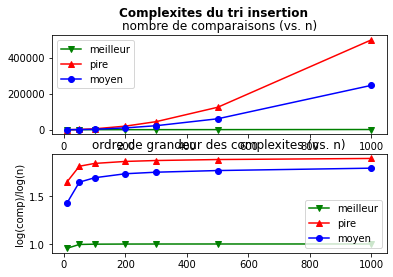

In [12]:
plottestcomp()

### Vers l'analyse de la complexité

Le tri insertion se compose de deux boucles imbriquées : `for ` puis `while`


- Quel paramètre de la complexité en temps de ce tri ?
- Quelle mesure de la complexité en temps de ce tri ?
- Que penser de la boucle `while` dans le pire cas ?
- Que penser de la boucle `while` dans le meilleur cas ?
- Que penser de la boucle `for` dans le pire et dans le meilleur cas ?
- En déduire une expression de la complexité :
    - dans le pire cas
    - dans le meilleur cas
- En déduire la complexité asymptotique dans le pire cas.


## Tri rapide (ou _quicksort_)

Un premier exemple de tri (par comparaisons) récursif très efficace en pratique

### Principe

Ranger une valeur à sa place définitive
- toutes celles à sa gauche sont plus petites
- toutes celles à sa droite sont plus grandes
- ces sous-tableaux gauche et droit ne sont pas (encore) triés

Dans la figure suivante, la valeur `v` est définitivement bien placée : 
![Illustration de l'invariant du tri rapide](fig/quicksort-invariant.png)

Cette propriété est un _invariant_ du tri rapide. 

### Récursion

1. Hypothèse de départ :
    - on suppose une des valeurs du tableau correctement placée, 
        - en `t[p]` par exemple 
    - le tableau initial `t[0..n[` est partagé en 2 sous-tableaux :
        - `t_gauche[0.. p[` et 
        - `t_droit[p+1 .. n[`  
2. Récursion
    - on trie chacun de ces sous-tableaux _en appliquant le même principe_  
3. Terminaison : un sous-tableau trié
    - le sous-tableau est de taille 1 : 
    - réduit à 1 élément == pivot == bien placé

### Principe de mise en oeuvre  avec duplication du tableau `t`

Une première mise en oeuvre "à vocation pédagogique" s'appuie sur la duplication du tableau de valeurs à chaque étape de la récursion.

**Etape 1 :** placer correctement le pivot `v` 
- parcourir et comparer chaque élément `t[i]` avec `v` 
- si `t[i] < v`, laisser `t[i]` à gauche de `v`
- sinon déplacer `t[i]` à droite de `v` 
![invariant du tri rapide](fig/quicksort-invariant.png)

En pratique, 
- le choix du pivot est arbitraire :
    - `t[0]` par exemple dans la suite
- les déplacement peuvent être réalisés avec 2 tableaux (par exemple) :
    - tableau source $\to$ tableau destination
    - On remplit le tableau destination par chacun de ses 2 bouts
    - et on place `t[0]` à la fin.
![avec 2 tableaux](fig/quicksort-parcours.png)

**Etape 2 :** récursion sur chacun des deux sous-tableaux gauche et droit

Le premier pivot (`t[0]` ici) est correctement placé.
![pivot](fig/quicksort-init.png)

La récursion sur chacun des deux sous-tableaux gauche et droit permet de placer correctement les 2 nouveaux pivots `t[*]`.  
![recursion](fig/quicksort-recursion.png)
- `t[*]` peuvent à nouveau être "les `t[0]`" de chacun des sous-tableaux.

#### Exemple

On déroule à la main ce tri rapide pour trier le tableau `t= [4,3,5,8,2,6,7]`.

![exemple](fig/quicksort-exemple.png)

### Mise en oeuvre en place

Le principe étant bien compris, on effectue un traitement équivalent _en place_, c-a-d. sans dupliquer le tableau de valeurs.

**Rmq:** _Les valeurs entre `[.]` sont les numéros de ligne dans le code de `partition` qui suit.  
Hélas les numéros de lignes n'apparaissent pas dans la version html ; 
le def est en ligne 1, 
le assert en ligne 10 ... 
et le return en ligne 23._

1. une fonction `partition` organise le sous-tableau `t[g..d[` comme suit.
    - _`[11]`_ on choisit  `t[d-1]` comme pivot (autre choix arbitraire)   
    - _`[21]`_ à la fin de l'itération, il se retrouvera en `t[m]`   
    - l'indice `m` va partitionner le tableau en 2 parties : à gauche, les valeurs  inférieures ou égales au pivot, à droite, à partir de `m+1`, les valeurs strictement supérieures
        - _`[13]`_ pour cela, on parcourt `t` de `g` vers `d-1` (`d-1` exclus) 
        - _`[12]`_ on initialise `m = g`  : si le pivot est la plus petite valeur de `t[g,d[` alors il doit finir en `t[g]`
        - _`[15:17]`_ on permute chaque valeur rencontrée plus petite que le pivot avec `t[m]`, et
        - _`[18]`_ `m` est incrémenté car le nombre de valeurs inférieures au pivot vient d'être augmenté de 1 
            - `m` reste (pour l'instant) l'indice de la première valeur strictement supérieure au pivot : 
            - ainsi `m` est l'indice qui sépare les 2 partitions gche (valeurs plus petites ou égales que le pivot) et droite (plus grandes) de `t`  
        - _`[20]`_ et une fois arrivé en `d-1`, on permute `t[m]` et le pivot :
            - le pivot se retrouve en `t[m]`, ce qui conserve la partition "gauche-droite" et correspond à l'objectif  
    - **remarque** : la fonction retourne la valeur de séparation `m` 
    - **remarque** : ce traitement s'effectue en place : pas la peine de renvoyer le tableau  

2. la récursion `trirapide0( )` appelle (récursivement) `partition()` sur les 2 sous-tableaux délimités _de façon exclusive_  par `m` (cad `t[g,m[` et `t[m+1,d[`), et ce tant que leur longueur est plus grande que 1 ; sinon terminaison  

3. la fonction `trirapide()` réalise l'appel principal sur le tableau complet `t[g,d[` :
    - soit l'appel pour `g==0` et `d==len(t)`

In [13]:
def partition(t: list[int], g: int, d: int) -> int:
    """partitionne t[g,d[
    invariant : avant la boucle i
    si g<=k < m, t[k] <= pivot
    si m+1<=k <= i-1, t[k]  > pivot
    **** choix arbitraire: t[d-1] = pivot. 
    Cad : t[g,m] <= pivot < t[m+1,d[ (*)
    avec pivot = t[m]
    et m+1 indice du premier > pivot"""
    assert g < d-1 # t contient au moins 2 éléments
    
    pivot = t[d-1]
    m = g
    for i in range(g, d-1): # d-1 non atteint
        if t[i] <= pivot: 
            tmp = t[i] # permuter t[m] et t[i]
            t[i] = t[m]
            t[m] = tmp
            m = m+1 # m attend le prochain <= pivot
    # placer pivot a sa place definitive
    t[d-1] = t[m] 
    t[m] = pivot
    #print("partition :", t[g:d])
    return m

In [14]:
def trirapide0(t: list[int], g: int, d: int) -> None:
    '''partitionne t[g,d[ 
    et appels récursifs sur t[g,m[ et t[m+1,d['''
    if d - g > 1: #il reste au moins 2 elmnts ds cette sous-partie de t
        m = partition(t, g, d)
        trirapide0(t, g, m-1) 
        trirapide0(t, m+1, d)  

def trirapide(t: list[int], n: int) -> None:
    '''tri rapide de t[0, len(t)['''
    trirapide0(t, 0, len(t)) 

In [15]:
#t = tabalea(10)
t = [15,4,2,8,17,23,0,1]
print("avant :", t)
trirapide(t, len(t))
print("après :", t)

avant : [15, 4, 2, 8, 17, 23, 0, 1]
après : [0, 1, 2, 4, 8, 15, 17, 23]


### Exercices

* Ecrire une version (`partition2`) plus simple avec duplication du tableau  
* Ecrire une version qui affiche les évolutions successives de `t` après chaque pivot

### Corrections


In [16]:
def partition2(t, n, g, d):
    '''Quicksort avec duplication tableaux
    partitionne t[g, d[ autour du pivot (ici l élément de gauche t[g])
    retourne la position finale du pivot'''
    assert g < d
    # on définit t_cible et on place les indices à ses 2 bouts
    i = g
    j = d-1
    # choix arbitraire du pivot
    pivot = t[g]
    # on y va
    for k in range(g+1, d): 
        if t[k] <= pivot: 
            t_cible[i] = t[k] # on remplit t_cible par la gauche 
            i = i + 1  
        else: 
            t_cible[j] = t[k] # on remplit t_cible par la droite
            j = j - 1  
    # on peut placer le pivot à la place qui reste
    assert i == j
    m = i
    t_cible[m] = pivot
    
    # on met à jour t[g,d[ à l aide de t_cible
    t[g:d]  = [t_cible[i] for i in range(g,d)]
    print("partition [g, d[:m -> [", g, ',' , d,"[:", m,  t_cible[g:d], t[g:d])

    return m

In [17]:
def triRapideRec2(t, g, d):
    if d - g > 1: #il reste au moins 2 elmnts ds cette sous-partie de t
        m = partition2(t, len(t), g, d)       
        triRapideRec2(t, g, m) # m est exclu
        triRapideRec2(t, m+1, d)

def trirapide2(t):
    global t_cible # bien noter le global !!
    t_cible = [0 for i in range(len(t))]
    print("dem :", t_cible, t)
    triRapideRec2(t, 0, len(t))
    

In [18]:
t = tabalea(7)
print("avant :", t)
trirapide2(t)
print("après :", t)

avant : [35, 33, 33, 95, 10, 8, 50]
dem : [0, 0, 0, 0, 0, 0, 0] [35, 33, 33, 95, 10, 8, 50]
partition [g, d[:m -> [ 0 , 7 [: 4 [33, 33, 10, 8, 35, 50, 95] [33, 33, 10, 8, 35, 50, 95]
partition [g, d[:m -> [ 0 , 4 [: 3 [33, 10, 8, 33] [33, 10, 8, 33]
partition [g, d[:m -> [ 0 , 3 [: 2 [10, 8, 33] [10, 8, 33]
partition [g, d[:m -> [ 0 , 2 [: 1 [8, 10] [8, 10]
partition [g, d[:m -> [ 5 , 7 [: 5 [50, 95] [50, 95]
après : [8, 10, 33, 33, 35, 50, 95]


### Performances, pire cas, meilleur cas

S'inspirer de la démarche sur `triInsertion( )` avec les exercices suivants. Bon travail !

#### Exercices 
* Ecrire une version qui compte le nombre de comparaisons  
* Générer le pire cas , et le meilleur cas, puis vérifier  



In [19]:
def partitionCompte(t, g, d):
    """version avec decompte nbre comp :"""
    global nb 
    assert g < d-1 # t contient au moins 2 éléments
    pivot = t[d-1]
    m = g
    for i in range(g, d-1): # d-1 non atteint
        nb = nb + 1
        if t[i] <= pivot: 
            tmp = t[i] # permuter t[m] et t[i]
            t[i] = t[m]
            t[m] = tmp
            m = m+1 # m attend le prochain <= pivot
    # placer pivot a sa place definitive
    t[d-1] = t[m] 
    t[m] = pivot
    #print("partition :", t[g:d])
    print("m:", m)
    return m

def trirapide0Compte(t, g, d):
    """version avec decompte nbre comp :"""
    if d - g > 1: #il reste au moins 2 elmnts ds cette sous-partie de t
        m = partitionCompte(t, g, d)
        trirapide0Compte(t, g, m-1) 
        trirapide0Compte(t, m+1, d)

def trirapideCompte(t):
    '''version avec decompte nbre comp :
    tri rapide de t[0, len(t)['''
    global nb
    nb = 0
    trirapide0Compte(t, 0, len(t))
    return nb

In [20]:
#t = tabalea(10)
t = [15,4,2,8,17,23,0,1]
print("avant :", t)
nbcomp = trirapideCompte(t)
print("après :", t)
print("nb comparaisons :", nbcomp)

print("* Pire cas : ")
#t_pire = [i for i in range(7,-1,-1)]
t_pire = [1, 2, 3, 4, 5, 6, 7, 0]
print("avant :", t_pire)
nbcomp = trirapideCompte(t_pire)
print("après :", t_pire)
print("nb comparaisons :", nbcomp)

print("* Meilleur cas : ")
t_best = [0, 2, 1 , 5, 6,  4, 3]
print("avant :", t_best)
nbcomp = trirapideCompte(t_best)
print("après :", t_best)
print("nb comparaisons :", nbcomp)



avant : [15, 4, 2, 8, 17, 23, 0, 1]
m: 1
m: 3
m: 4
m: 6
après : [0, 1, 2, 4, 8, 15, 17, 23]
nb comparaisons : 17
* Pire cas : 
avant : [1, 2, 3, 4, 5, 6, 7, 0]
m: 0
m: 1
m: 2
m: 3
m: 4
m: 5
m: 6
après : [0, 1, 2, 3, 4, 5, 6, 7]
nb comparaisons : 28
* Meilleur cas : 
avant : [0, 2, 1, 5, 6, 4, 3]
m: 3
m: 1
m: 5
après : [0, 2, 1, 3, 4, 5, 6]
nb comparaisons : 9


### Vers l'analyse de la complexité

Le tri rapide :

- consiste en des appels récursifs qui effectuent des partitions successives (en 2 sous-tableaux de taille strictement inférieure) jusqu'à terminaison (sous-tableau de taille 1 ou 0). 
- Chacune de ces partitions permet de placer correctement le pivot associé.

Les questions suivantes guident l'analyse de la complexité du pire et du meilleur cas de cet algorithme.

- Quel paramètre de la complexité en temps de ce tri ?
- Quelle mesure de la complexité en temps de ce tri ?
- Analyse du pire cas :
    - Que penser de la taille des sous-tableaux à chaque appel récursif ?
    - Combien d'appels récursifs sont nécessaires au traitement de ce pire cas ?
    - Expliciter une relation de récurrence sur $C(n)$ la complexité de la partition d'un tableau de taille $n$ _dans le pire cas_
    - Expliciter $C(1)$ la complexité de la partition d'un tableau de taille $1$ 
    - En déduire $C(n)$ la complexité du tri rapide dans le pire cas ?
- Analyse du meilleur cas :
    - Que penser de la taille des sous-tableaux à appel récursif ?
    - Combien d'appels récursifs au plus (\*) sont nécessaires au traitement de ce meilleur cas ? (\*): Il est commode de ramener les tailles des (sous-)tableaux à des puissances de 2. On commence par exemple avec $n = 2^p$ valeurs à trier.
    - Expliciter une relation de récurrence sur $C(n)$ la complexité de la partition d'un tableau de taille $n$ _dans le meilleur cas_
    - Expliciter $C(1)$ la complexité de la partition d'un tableau de taille $1$ 
    - En déduire $C(n)$ la complexité du tri rapide dans le meilleur cas ?
- A partir de ces deux cas, que penser du tri rapide  ?
- En déduire les complexités asymptotiques des meilleurs et pires cas.   

## Tri fusion

Un exemple de tri de complexité optimale (semi-logarithmique : $n\log(n)$) issu de la stratégie **diviser pour régner**.

### Principe

1. **Fusionner** 2 tableaux _triés_ pour obtenir un tableau unique _trié_ 
- Facile : il suffit de répéter la comparaison du premier élément de chacun des 2 tableaux.
2. Obtenir 2 tableaux triés ? **Récursion**
- on divise le tableau `t[0..n[` en 2 sous-tableaux de taille moitié : par exemple
    - `t_gauche[0..n//2[` et 
    - `t_droit[n//2..n[`
- on trie chacun de ces sous-tableaux _en appliquant le même principe._
3. Terminaison : un sous-tableau trié.
- le sous-tableau est de **taille 1** : réduit à 1 élément

La figure suivante illustre ce principe.
![source openclassroom](fig/tri_fusion.png) (source openclassroom)

La forme récursive du tri fusion est issue d'une stratégie "diviser pour régner" similaire à celle utilisée pour la recherche dichotomique. En pratique, les appels récursifs définissent les moitiés de tableaux à manipuler. Le "coeur" de l'algorithme est donc la phase de fusion que nous détaillons maintenant.

### Exemple de la fusion de 2 tableaux triés

On illustre la fusion de 2 tableaux triés quelconques à l'aide de l'exemple suivant.

Fusionnons les 8 valeurs stockées dans les tableaux triés  `t_g =  [1,3,5,8,11]` et `t_d = [2,6,7]`.


**Rmq.** La récursion du tri fusion conduirait ici à 2 tableaux triés de taille 4 chacun. 


**Fusion**

![Fusionner 2 tableaux triés](./fig/fusion.png)

### Algorithme : analyse et (une) écriture

#### Fusion 

**Entrées** : 2 tableaux `t1` et `t2`, de longueurs `n1` et `n2`, **triés**  
**Sortie** : 1 tableau `t` de taille `n1+n2` qui sera trié

Plusieurs cas de figures sont possibles.
1. Les entrées `t1` et `t2`  sont des tableaux distincts ou des sous-tableaux d'un unique tableau.
    - dans le second cas, il faut connaître l'indice de séparation des valeurs de `t1` et `t2`dans `t`.
2. La fusion peut créer et retourner un nouveau tableau `t` 
    - et oublier `t1` et `t2` après la fusion  
    - facile mais coûteux en mémoire :)
4. utiliser 2 "grands tableaux" passés par l'utilisateur  
2. utiliser une copie locale

On va d'abord supposer :
- Les entrées `t1` et `t2` sont des sous-tableaux d'un unique tableau `a[g, d[` passé en paramètre. 
    - L'indice de séparation est donné comme paramètre `m`. 
- La sortie est un second tableau `b` aussi passé en paramètre.  
- La fusion est donc une procédure qui modifie `b`. 

In [21]:
def fusion(a: list[int], b: list[int], g: int, m: int, d: int) -> None:
    """ fusion des 2 moitiés du tableau a en le tableau b.
    a et b sont passés en arguments (pas de copie locale, pas de return) : on prend dans a, on range dans b.
    entrées. a, b : 2 tableaux (de même taille).
    g, m, d : le sous-tab gauche est a[g,m[, celui de droite est a[m,d[
    sortie. b[g,d[ trié.
    """
    assert len(a)==len(b) # a[] et b[] sont de la même taille
    
    i, j = g, m           # i et j parcourent resp. les partie G et D de a[]
    for k in range(g, d): # k parcourt b[] de g à d-1
        if i < m and (j==d or a[i] < a[j]):
            # G n est pas vide
            b[k] = a[i]
            i = i+1
        else:
            b[k] = a[j]
            j = j+1
            
    return None 

In [22]:
t_in  = [2*i for i in range(5)] + [2*i+1 for i in range(5)]
t_out = [0 for i in range(10)]
print(t_in, t_out)

fusion(t_in, t_out, 0, 5, 10)

print(t_in, t_out)

[0, 2, 4, 6, 8, 1, 3, 5, 7, 9] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 4, 6, 8, 1, 3, 5, 7, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<div class="alert alert-block alert-info">
En première lecture, sauter la section suivante et aller en section 4.4 _Diviser pour régner._
</div>

#### Analyse plus détaillée de la programmation de la fusion

Affichons les états successifs du tableau fusionné.

In [23]:
def fusionPrint(a: list[int], b: list[int], g: int, m: int, d: int) -> None:
    """ version avec affichages de :
    fusion avec deux tableaux a et b passés en arguments
    (pas de copie locale, pas de return) : on prend dans a, on range dans b.
    entrées. a, b : 2 tableaux (de même taille).
    g, m, d : le sous-tab gauche est a[g,m-1], celui de droite est a[m,d-1]
    sortie. b[g,d] trié.
    """
    assert len(a)==len(b) # a[] et b[] sont de la même taille
    
    i, j = g, m           # i et j parcourent resp. les partie G et D de a[]
    for k in range(g, d): # k parcourt b[] de g à d-1
        if i < m and (j==d or a[i] < a[j]):
            # G n est pas vide
            b[k] = a[i]
            i = i+1
        else:
            b[k] = a[j]
            j = j+1
        print(k, ": ", b)
        
    return None

In [24]:
t_in  = [2*i for i in range(5)] + [2*i+1 for i in range(5)]
t_out = [0 for i in range(10)]
print(t_in)
fusionPrint(t_in, t_out, 0, 5, 10)
print(t_out)

[0, 2, 4, 6, 8, 1, 3, 5, 7, 9]
0 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 :  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 :  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
3 :  [0, 1, 2, 3, 0, 0, 0, 0, 0, 0]
4 :  [0, 1, 2, 3, 4, 0, 0, 0, 0, 0]
5 :  [0, 1, 2, 3, 4, 5, 0, 0, 0, 0]
6 :  [0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
7 :  [0, 1, 2, 3, 4, 5, 6, 7, 0, 0]
8 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
9 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


##### Petite amélioration 

On voit ce qui se passe à chaque itération.
Ce qui va permettre de constater qu'on traite inutilement des sous-tableaux vides.

In [25]:
t_in  = [i for i in range(10)]
print(t_in)
t_out = [0 for i in range(10)]
fusionPrint(t_in, t_out, 0, 5, 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 :  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 :  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
3 :  [0, 1, 2, 3, 0, 0, 0, 0, 0, 0]
4 :  [0, 1, 2, 3, 4, 0, 0, 0, 0, 0]
5 :  [0, 1, 2, 3, 4, 5, 0, 0, 0, 0]
6 :  [0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
7 :  [0, 1, 2, 3, 4, 5, 6, 7, 0, 0]
8 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
9 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Pourquoi ces appels inutiles ?

**Exercice :** Proposer un palliatif !

**Comment arrêter les parcours des (sous)-tableaux ?**  
Objectif : ne pas aller inutilement jusqu'au bout d'un sous-tableau alors que l'autre est vide.  

Plusieurs choix aussi :
1. en gérant les indices de façon adaptée
- à la manière du contrôle `j == d` dans `fusion()` qui indique si le tableau droit est vide
2. en introduisant des __sentinelles__ : valeurs choisies pour arrêter les itérations  
- exemple : une très grande valeur (un "infini") si on trie par ordre croissant

####  Exercice de programmation

Une seule version avec et sans affichage

In [26]:
def fusion(a: list[int], b: list[int], g: int, m: int, d: int, verb=False) -> None:
    """ version avec choix d'affichage de :
    fusion avec deux tableaux a et b passés en arguments
    (pas de copie locale, pas de return) : on prend dans a, on range dans b.
    entrées. a, b : 2 tableaux (de même taille).
    g, m, d : le sous-tab gauche est a[g,m-1], celui de droite est a[m,d-1]
    sortie. b[g,d] trié.
    """
    assert len(a)==len(b) # a[] et b[] sont de la même taille
    
    i, j = g, m           # i et j parcourent resp. les partie G et D de a[]
    for k in range(g, d): # k parcourt b[] de g à d-1
        if i < m and (j==d or a[i] < a[j]):
            # G n est pas vide
            b[k] = a[i]
            i = i+1
        else:
            b[k] = a[j]
            j = j+1
        if verb == True:
            print(k, ": ", b)
        
    return None
            

In [27]:
t = [i for i in range(10)]
tt = [0 for i in range (10)]

fusion(t, tt, 0, 5, 10)
print("sans affichage", tt)
tt = [0 for i in range (10)]

print("avec affichages")
fusion(t, tt, 0, 5, 10, True)

sans affichage [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
avec affichages
0 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 :  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 :  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
3 :  [0, 1, 2, 3, 0, 0, 0, 0, 0, 0]
4 :  [0, 1, 2, 3, 4, 0, 0, 0, 0, 0]
5 :  [0, 1, 2, 3, 4, 5, 0, 0, 0, 0]
6 :  [0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
7 :  [0, 1, 2, 3, 4, 5, 6, 7, 0, 0]
8 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
9 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Diviser pour régner

L'algorithme complet du tri fusion peut maintenant s'écrire à partir de l'analyse "diviser pour régner"  appliquée au tableau au tabelau à trier.

* Principe récursif de division en 2 parties de taille moitié jusqu'à obtenir un tableau de longueur 0 ou 1  
* terminaison : 
    - tableau vide (longueur 0) : `g >= d`
    - tableau de longueur 1 : `g == d-1`

In [28]:
def trifusion(a: list[int], dim_a: int) -> None:
    """tri fusion qui utilise fusion(a,b,g,m,d)
    avec une fonction récursive locale pour travailler sur 1 seul tableau"""
    b = a[:] # copie de a
    
    # fonction recursive locale
    def trifusion_rec(g: int, d: int):
        if g  >= d-1 : # 0 ou 1 éléments
            return        
        m = (g+d)//2
        trifusion_rec(g, m)
        trifusion_rec(m, d)
        b[g:d] = a[g:d]
        fusion(b, a, g, m, d)
        
    # appel principal
    trifusion_rec(0, len(a))
    #
    return None

In [29]:
t  = [2*i for i in range(4)] + [2*i+1 for i in range(4)]
print(t)
trifusion(t, len(t))
print(t)


[0, 2, 4, 6, 1, 3, 5, 7]
[0, 1, 2, 3, 4, 5, 6, 7]


**A venir :** le même principe "divise pour régner" avec des variations d'implémentation.

### Performances, pire cas, meilleur cas

S'inspirer des démarches précédentes. Bon travail !

In [30]:
def fusionOpt(a, b, g, m, d, verb=False, compteFusion=False):
    """ version avec choix d'affichage et decompte comparaison de :
    fusion avec deux tableaux a et b passés en arguments
    (pas de copie locale, pas de return) : on prend dans a, on range dans b.
    entrées. a, b : 2 tableaux (de même taille).
    g, m, d : le sous-tab gauche est a[g,m-1], celui de droite est a[m,d-1]
    sortie. b[g,d] trié.
    """
    global nb # pour le decompte des comparaisons
    assert len(a)==len(b) # a[] et b[] sont de la même taille
    i, j = g, m           # i et j parcourent resp. les partie G et D de a[]
    for k in range(g, d): # k parcourt b[] de g à d-1
        if compteFusion == True:
            nb = nb + 1
        if i < m and (j==d or a[i] < a[j]):
            # G n est pas vide
            b[k] = a[i]
            i = i+1
        else:
            b[k] = a[j]
            j = j+1
        if verb == True:
            print(k, ": ", b)
            
t = [i for i in range(10)]
tt = [0 for i in range (10)]

fusionOpt(t, tt, 0, 5, 10)
print("sans affichage", tt)
tt = [0 for i in range (10)]

print("avec affichages")
fusionOpt(t, tt, 0, 5, 10, True)

sans affichage [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
avec affichages
0 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 :  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 :  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
3 :  [0, 1, 2, 3, 0, 0, 0, 0, 0, 0]
4 :  [0, 1, 2, 3, 4, 0, 0, 0, 0, 0]
5 :  [0, 1, 2, 3, 4, 5, 0, 0, 0, 0]
6 :  [0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
7 :  [0, 1, 2, 3, 4, 5, 6, 7, 0, 0]
8 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
9 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
def trifusionOpt(a, dim_a, compte=False):
    """version avec decompte comparaisons de 
    tri fusion qui utilise fusion(a,b,g,m,d)
    avec une fonction récursive locale pour travailler sur 1 seul tableau"""
    if compte == True:
        global nb 
        nb = 0
    b = a[:] # copie de a
    # fonction recursive locale
    def trifusion_rec(g, d):
        if g  >= d - 1: # 0 ou 1 éléments
            return        
        m = (g+d)//2
        trifusion_rec(g, m)
        trifusion_rec(m, d)
        b[g:d] = a[g:d]
        fusionOpt(b, a, g, m, d, compteFusion=compte)
    # appel principal
    trifusion_rec(0, len(a))
    #
    if compte == True:
        return nb



In [32]:
from random import randint 
t_best = [randint(0,8) for i in range(8)]
t_pire = [randint(0,8) for i in range(8)]
print(t_best, t_pire)
nbcomp = trifusionOpt(t_best, len(t), True)
print(t_best)
print("nb comparaisons:", nbcomp)
nbcomp = trifusionOpt(t_pire, len(t), True)
print(t_pire)
print("nb comparaisons:", nbcomp)



[8, 5, 3, 0, 7, 0, 8, 2] [3, 3, 2, 1, 7, 6, 1, 6]
[0, 0, 2, 3, 5, 7, 8, 8]
nb comparaisons: 24
[1, 1, 2, 3, 3, 6, 6, 7]
nb comparaisons: 24


### Vers l'analyse de la complexité

Le tri fusion consiste en des appels récursifs qui :
- effectuent des _partitions_ successives en 2 sous-tableaux de taille moitié jusqu'à terminaison (sous-tableau de taille 1 ou 0 donc trié),
- puis des _fusions_ de sous-tableaux triés en un tableau trié de longueur double.  

Ainsi, la dernière fusion construit le tableau complet trié.  

Les questions suivantes guident l'analyse de la complexité du pire et du meilleur cas de cet algorithme.

- Quel paramètre de la complexité en temps de ce tri ?
- Quelle mesure de la complexité en temps de ce tri ?
- Analyse pour $n = 2^p$ valeurs à trier.
    - Que penser de la taille des sous-tableaux à chaque appel récursif ?
    - Combien d'appels récursifs sont nécessaires à la terminaison des appels récursifs ?
    - Pour $n$ ainsi fixé, que penser d'un pire cas et d'un meilleur cas ?
    - Expliciter une relation de récurrence sur $C(n)$ la complexité du tri fusion d'un tableau de taille $n= 2^p$
    - Expliciter $C(1)$ la complexité du tri fusion d'un tableau de taille $2^0=1$ 
    - En déduire $C(n)$ la complexité du tri fusion ?
- Que penser du tri rapide  ?
- En déduire le complexité asymptotique du tri fusion.   

## Complexités de ces algorithmes de tri

On synthétise les différents résultats de complexité de ces algorithmes de tri.

|Complexité |Tri insertion|Tri rapide|Tri fusion|
|:--:|:--:|:--:|:--:|
| en mémoire | tri en place | tri en place | **NON** |  
| en temps : pire cas | quadratique : $\cal{O}(n^2)$| **quadratique:** $\cal{O}(n^2)$ | semi-logarithmique: $\cal{O}(n\log(n))$ |    
| . | double boucle imbriquée `for`-`while` complètes | $$C(n) = n-1 + C(n-1)$$ $$C(1)=0$$ | $$C(n) = C(n/2) + f(n)$$ $$\text{fusion}: f(n)=n-1$$ | 
| en temps : meilleur cas | linéaire : $\cal{O}(n)$| semi-logarithmique: $\cal{O}(n\log(n))$ | semi-logarithmique: $\cal{O}(n\log(n))$ |       
| . | boucle interne `while` vide | $$C(n) = n-1 + 2\times C(n/2)$$ $$C(1)=0$$ | $$C(n) = C(n/2) + f(n)$$ $$\text{fusion}: f(n)=n/2$$ | 
| en temps : cas moyen | quadratique : $\cal{O}(n^2)$ | **semi-logarithmique:** $\cal{O}(n\log(n))$ | semi-logarithmique: $\cal{O}(n\log(n))$ |   

## ($\star$) Prouver la correction de ces algorithmes de tri

On explicite les invariants des algorithmes présentés dans ce chapitre.
On laisse en exercice la preuve de ces invariants.

### Tri insertion

> (P) Avant l’itération i, le sous-tableau `t[0, i[` est trié.

### Tri rapide (_quicksort_)

Invariant de `partition(t, g, d)` :

> au début de l'itération $i$ : pour tout $k$ dans $[g, d[$, on a :
>
> - si $g \le k \le m$ 	alors $t[k] \le v$,
> - si $m+1 \le k < i$ 	alors $t[k] > v$,
> - si $g = d-1$ 		alors $t[k] = v.$

Remarque : on ne dit rien sur la tranche $t[i, d-1[$ qui sont a priori quelconques.



### Tri fusion

Invariant de la boucle `for` dans `fusion(t, g, m, d)` :
> au début de l'itération $i$ :
> - le sous-tableau $t[g, k[$ contient en ordre trié les $(k-g)$ plus petits éléments de $G[0, m-g[$ et $D[0, d-m[$ ;
> - $G[i1]$ et $D[i2]$ sont les plus petits éléments respectifs de G et D a ne pas avoir été copiés dans t.



## Conclusion

- Trois algorithmes de tris de complexités différentes
    - pires cas, meilleurs cas 
    - cas moyen pour le tri rapide

- Mises en oeuvre "naturelles" différentes : itératif _vs_ récursif

- Exemples d'application du paradigme "diviser pour régner"

- Exemples d'invariant 
    - pour prouver la correction de l'algorithme
    